# Import Library

In [1]:
# Import libraries for data exploration and linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from xgboost import plot_tree

import torch
from torch import nn
from torch.utils.data import DataLoader
#from torch.utils.data import Dataset
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Data Preperation

In [2]:
# Read the data from an xlsx file, the specimen sheet which is the third sheet in the file
Data = pd.read_excel('3DPrintedShell.xlsx', sheet_name='Data')
Data = Data.drop(['Specimen_Number'], axis=1)
Data.head()

,Layer_Height,Youngs_Modulus,Tensile_Yield_Strength,Poisson_Ratio,Horizontal Young's Modulus(GPa),Vertical Young's Modulus(GPa),Horizontal Poisson's Ratio,Vertical Poisson's Ratio,Horizontal Shear Modulus(GPa),Vertical Shear Modulus(GPa),Horizontal Tensile Yield Strength (MPa),Vertical Tensile Yield Strength (MPa)
0,0.15,0.70,79.1,0.360,0.699993,0.640415,0.334498,0.358769,0.262268,0.257584,79.099727,77.733572
1,0.15,3.19,46.3,0.286,3.189969,2.758698,0.266472,0.285695,1.259392,1.240562,46.299847,43.605788
2,0.10,2.49,41.0,0.396,2.489935,2.535910,0.376472,0.394883,0.904462,0.892525,40.999601,42.725930
3,0.15,2.89,25.4,0.214,2.889971,2.400371,0.199836,0.214164,1.204319,1.190108,25.399922,22.737854
4,0.20,4.96,59.6,0.226,4.959972,3.833477,0.206133,0.225735,2.056146,2.023265,59.600000,50.305103


# XGBoost

## Preperation

In [3]:
from sklearn.metrics import r2_score

def eval_model(model, X_train, X_test, y_train, y_test, verbose=False):

    y_train_list = y_train.values.tolist()
    y_train2 = []
    
    y_test_list = y_test.values.tolist()
    y_test2 = []
    
    pred_train = model.predict(X_train)
    pred_train2 = []
    
    pred_test = model.predict(X_test)
    pred_test2 = []

    rmse_train = []
    rmse_test = []
    r2 = []

    for i in range(8): #category
        temp = []
        for j in range(len(y_train_list)): #number of predicted data
            temp.append(y_train_list[j][i])
        y_train2.append(temp)

    for i in range(8): #category
        temp = []
        for j in range(len(y_test_list)): #number of predicted data
            temp.append(y_test_list[j][i])
        y_test2.append(temp)

    for i in range(8): #category
        temp = []
        for j in range(len(pred_train)): #number of predicted data
            temp.append(pred_train[j][i])
        pred_train2.append(temp)

    for i in range(8): #category
        temp = []
        for j in range(len(pred_test)): #number of predicted data
            temp.append(pred_test[j][i])
        pred_test2.append(temp)

    for i in range(8):
        rmse_train.append(np.sqrt(mean_squared_error(y_train2[i], pred_train2[i])))
        rmse_test.append(np.sqrt(mean_squared_error(y_test2[i], pred_test2[i])))
        r2.append(r2_score(y_test2[i], pred_test2[i]))
    
    if verbose:
        print(f"Train RMSE = {rmse_train:.2e}")
        print(f"Test  RMSE = {rmse_test:.2e}")
    
    return rmse_train, rmse_test, r2

In [4]:
# filament material data and printing process parameters
input = Data[["Layer_Height", "Youngs_Modulus", "Tensile_Yield_Strength", "Poisson_Ratio"]]

# effective material data of 3D-printed shell
output = Data[["Horizontal Young's Modulus(GPa)", "Vertical Young's Modulus(GPa)", 
              "Horizontal Poisson's Ratio", "Vertical Poisson's Ratio", 
              "Horizontal Shear Modulus(GPa)", "Vertical Shear Modulus(GPa)",
              "Horizontal Tensile Yield Strength (MPa)", "Vertical Tensile Yield Strength (MPa)"]]

In [5]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2,random_state=1)

## Selected Model

In [6]:
parameter = [0.05,5,1000]

forward = XGBRegressor(objective ='reg:squarederror', seed = 123, n_estimators =parameter[2], eta=parameter[0], max_depth=parameter[1],enable_categorical=True)
forward.fit(X_train, y_train)
rmse_train, rmse_test, r2 = eval_model(forward, X_train, X_test, y_train,y_test)

y_test_list = y_test.values.tolist()
y_test2 = []

preds = forward.predict(X_test)
preds2 = []

-------- Horizontal Young's Modulus(GPa) --------


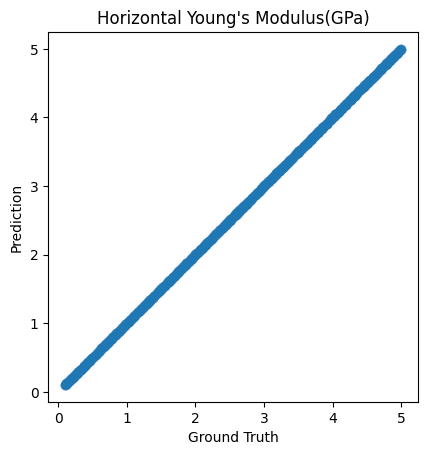

RMSE of the base model: 0.005
R-squared of the base model: 1.000

-------- Vertical Young's Modulus(GPa) --------


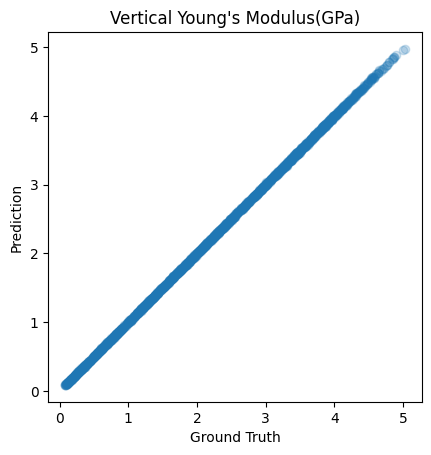

RMSE of the base model: 0.009
R-squared of the base model: 1.000

-------- Horizontal Poisson's Ratio --------


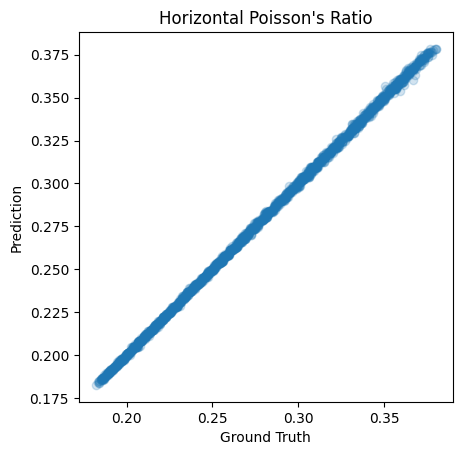

RMSE of the base model: 0.001
R-squared of the base model: 1.000

-------- Vertical Poisson's Ratio --------


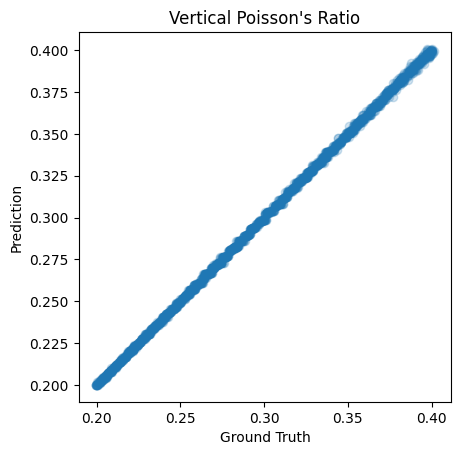

RMSE of the base model: 0.001
R-squared of the base model: 1.000

-------- Horizontal Shear Modulus(GPa) --------


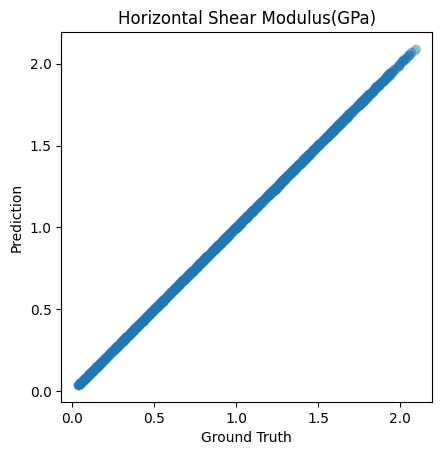

RMSE of the base model: 0.003
R-squared of the base model: 1.000

-------- Vertical Shear Modulus(GPa) --------


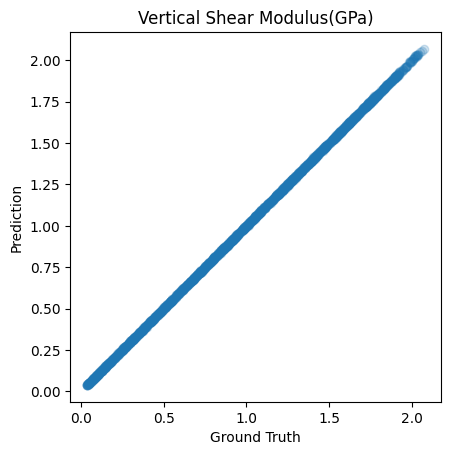

RMSE of the base model: 0.003
R-squared of the base model: 1.000

-------- Horizontal Tensile Yield Strength (MPa) --------


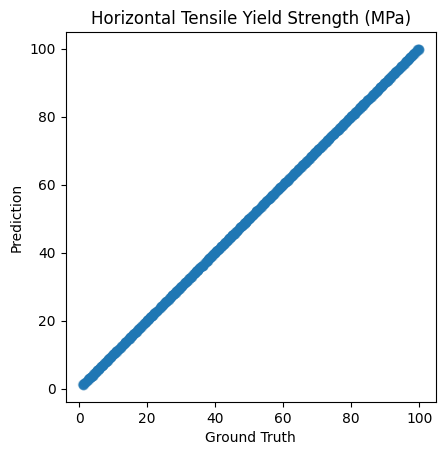

RMSE of the base model: 0.122
R-squared of the base model: 1.000

-------- Vertical Tensile Yield Strength (MPa) --------


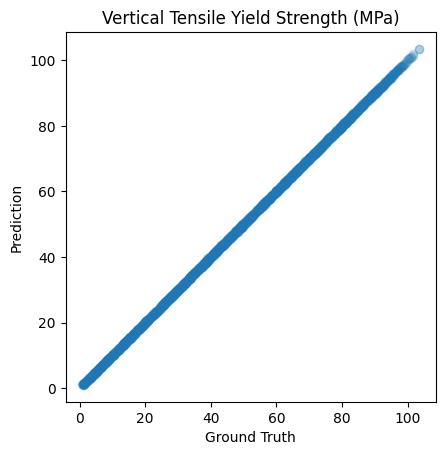

RMSE of the base model: 0.184
R-squared of the base model: 1.000



In [7]:
title = ['Horizontal Young\'s Modulus(GPa)','Vertical Young\'s Modulus(GPa)','Horizontal Poisson\'s Ratio','Vertical Poisson\'s Ratio','Horizontal Shear Modulus(GPa)','Vertical Shear Modulus(GPa)','Horizontal Tensile Yield Strength (MPa)','Vertical Tensile Yield Strength (MPa)']

for i in range(len(title)): #category
    temp = []
    for j in range(len(preds)): #number of predicted data
        temp.append(preds[j][i])
    preds2.append(temp)

for i in range(len(title)): #category
    temp = []
    for j in range(len(y_test_list)): #number of predicted data
        temp.append(y_test_list[j][i])
    y_test2.append(temp)


for i in range(8):
    
    print("--------",title[i],"--------")
    
    ax = plt.axes()
    ax.set_facecolor("white")

    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')

    #plt.subplot(3,8,i+1)

    plt.scatter(y_test2[i], preds2[i],alpha=0.2)
    plt.xlabel('Ground Truth')
    plt.ylabel('Prediction')
    plt.title(title[i])
    ax.set_aspect('equal', adjustable='box')
    plt.show()

    print(f"RMSE of the base model: {rmse_test[i]:.3f}")
    print(f"R-squared of the base model: {r2[i]:.3f}")

    print("")

## K-fold

In [8]:
def forwardKfold(X,y):
    
    kf = KFold(n_splits=5,shuffle=True)

    X_train_folds = []
    X_test_folds = []
    y_train_folds = []
    y_test_folds = []

    for i, (train_index, test_index) in enumerate(kf.split(X)):
        
        X_train_folds.append(X.iloc[train_index])
        X_test_folds.append(X.iloc[test_index])
        
        y_train_folds.append(y.iloc[train_index])
        y_test_folds.append(y.iloc[test_index])

    rmse_test_average = [[],[],[],[],[]]
    r2_average = [[],[],[],[],[]]

    title = ['Horizontal Young\'s Modulus(GPa)','Vertical Young\'s Modulus(GPa)','Horizontal Poisson\'s Ratio','Vertical Poisson\'s Ratio','Horizontal Shear Modulus(GPa)','Vertical Shear Modulus(GPa)','Horizontal Tensile Yield Strength (MPa)','Vertical Tensile Yield Strength (MPa)']

    for i in range(5):

        X_train = X_train_folds[i]
        X_test = X_test_folds[i]
    
        y_train = y_train_folds[i]
        y_test = y_test_folds[i]

        forward_k = XGBRegressor(objective ='reg:squarederror', seed = 123, n_estimators =parameter[2], eta=parameter[0], max_depth=parameter[1],enable_categorical=True)
        forward_k.fit(X_train, y_train)
        rmse_train, rmse_test, r2 = eval_model(forward_k,X_train,X_test,y_train,y_test)

        y_test_list = y_test.values.tolist()
        y_test2 = []

        preds = forward_k.predict(X_test)
        preds2 = []

        for a in range(len(title)): #category
            temp = []
            for b in range(len(preds)): #number of predicted data
                temp.append(preds[b][a])
            preds2.append(temp)

        for c in range(len(title)): #category
            temp = []
            for d in range(len(y_test_list)): #number of predicted data
                temp.append(y_test_list[d][c])
            y_test2.append(temp)

    
        for j in range(len(title)):
            rmse_test_average[i].append(rmse_test[j])
            r2_average[i].append(r2[j])
            
    rmse_test_average = list(map(list, zip(*rmse_test_average)))
    r2_average = list(map(list, zip(*r2_average)))

    return rmse_test_average, r2_average



In [9]:
title = ['Horizontal Young\'s Modulus(GPa)','Vertical Young\'s Modulus(GPa)','Horizontal Poisson\'s Ratio','Vertical Poisson\'s Ratio','Horizontal Shear Modulus(GPa)','Vertical Shear Modulus(GPa)','Horizontal Tensile Yield Strength (MPa)','Vertical Tensile Yield Strength (MPa)']


rmse_test_list, r2_list = forwardKfold(input, output)

for k in range(len(title)):
    print("----",title[k],"----")

    print(f"RMSE of the base model: {sum(rmse_test_list[k])/5:.7f}")
    print(f"R-squared of the base model: {sum(r2_list[k])/5:.7f}")

    print("")

---- Horizontal Young's Modulus(GPa) ----
RMSE of the base model: 0.0056176
R-squared of the base model: 0.9999843

---- Vertical Young's Modulus(GPa) ----
RMSE of the base model: 0.0081919
R-squared of the base model: 0.9999579

---- Horizontal Poisson's Ratio ----
RMSE of the base model: 0.0009630
R-squared of the base model: 0.9996829

---- Vertical Poisson's Ratio ----
RMSE of the base model: 0.0009377
R-squared of the base model: 0.9997385

---- Horizontal Shear Modulus(GPa) ----
RMSE of the base model: 0.0031133
R-squared of the base model: 0.9999687

---- Vertical Shear Modulus(GPa) ----
RMSE of the base model: 0.0030035
R-squared of the base model: 0.9999699

---- Horizontal Tensile Yield Strength (MPa) ----
RMSE of the base model: 0.1210170
R-squared of the base model: 0.9999821

---- Vertical Tensile Yield Strength (MPa) ----
RMSE of the base model: 0.1886940
R-squared of the base model: 0.9999525

